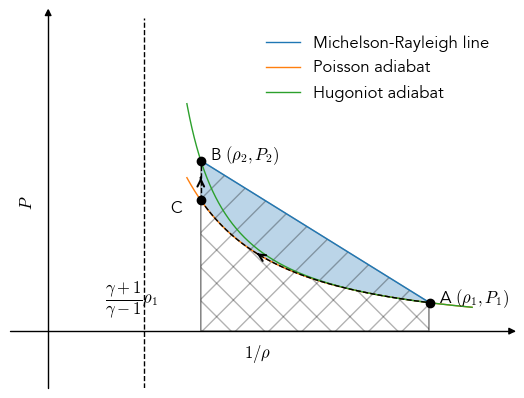

In [ ]:
# P - 1/rho plane plot with Hugoniot, Poisson adiabat, and Rayleigh line
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('grayscale')
plt.style.use('../academic-mplstyle/nice.mplstyle')
from mpl_toolkits.axisartist.axislines import AxesZero

# Parameters
gamma = 5/3
rho1 = 1.0
P1 = 1.0
rho2 = 2.5

# Hugoniot pressure
def P_hugoniot(rho):
    return P1 * ((gamma + 1)*rho - (gamma - 1)*rho1) / ((gamma + 1)*rho1 - (gamma - 1)*rho)

P2 = P_hugoniot(rho2)

# Poisson (isentropic) adiabat
def P_poisson(rho):
    return P1 * (rho/rho1)**gamma

# Rayleigh line (straight line in P-v plane)
v1 = 1/rho1
v2 = 1/rho2
def P_rayleigh(v):
    return P1 + (P2 - P1)*(v - v1)/(v2 - v1)

# Grids
rho = np.linspace(rho1*0.9, rho2*1.1, 400)
v = 1/rho

# Axis with arrow style
# https://matplotlib.org/stable/gallery/axisartist/demo_axisline_style.html
fig = plt.figure()
ax = fig.add_subplot(axes_class=AxesZero)
for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

plt.plot([v1, v2], [P1, P2], label="Michelson-Rayleigh line")
plt.plot(v, P_poisson(rho), label="Poisson adiabat")
plt.plot(np.linspace(v2, v1, 500), P_poisson(1/np.linspace(v2, v1, 500)), color='k', linestyle='--', zorder=10)
plt.plot(v, P_hugoniot(rho), label="Hugoniot adiabat")
plt.vlines(1/rho2, ymin=P_poisson(rho2), ymax=P2, color='k', linestyle='--', zorder=10)

max_rho2 = (gamma + 1)/(gamma - 1) * rho1
plt.axvline(1 / max_rho2, color='k', linestyle='--')
plt.text(1/max_rho2 - 0.1, 1, "$\\dfrac{\\gamma + 1}{\\gamma - 1} \\rho_1$", )

# Shade area between Rayleigh line and Poisson adiabat
plt.fill_between(v, P_rayleigh(v), P_poisson(rho), where=((P_rayleigh(v) > P_poisson(rho)) & (rho < rho2)), alpha=0.3) #color='none', edgecolor='k', hatch='/', linewidth=0)
plt.fill_between(v, P_rayleigh(v), 0, where=((P_rayleigh(v) > P_poisson(rho)) & (rho < rho2)), color='none', edgecolor='k', hatch='/', alpha=0.3)
plt.fill_between(v, 0, P_poisson(rho), where=((P_rayleigh(v) > P_poisson(rho)) & (rho < rho2)), color='none', edgecolor='k', hatch='\\', alpha=0.3)

# States
plt.scatter([v1, v2], [P1, P2], zorder=10, color='k')
plt.scatter([v2], P_poisson(rho2), zorder=10, color='k')
plt.text(v2*0.8, P_poisson(rho2)*0.9, r"C")
plt.text(v1, P1, r"  A $(\rho_1,P_1)$")
plt.text(v2, P2, r"  B $(\rho_2,P_2)$")

# Arrows
# --- Arrow along Poisson adiabat (reversible path) ---

rho_arrow = 1.8 * rho1              # location along the adiabat
v_arrow = 1 / rho_arrow
P_arrow = P_poisson(rho_arrow)

# Small step to the left (higher rho -> smaller v)
drho = 0.05 * rho1
v_arrow_left = 1 / (rho_arrow + drho)
P_arrow_left = P_poisson(rho_arrow + drho)

ax.annotate(
    "",
    xy=(v_arrow_left, P_arrow_left),
    xytext=(v_arrow, P_arrow),
    arrowprops=dict(arrowstyle="->", linewidth=1.5)
)

# --- Vertical arrow on left boundary (constant v) ---

P_bottom = 0.5 * (P_poisson(rho2) + P2)
P_top = P_bottom + 0.1

ax.annotate(
    "",
    xy=(1/rho2, P_top),
    xytext=(1/rho2, P_bottom),
    arrowprops=dict(arrowstyle="->", linewidth=1.5)
)

plt.xlim(-0.1, 1.2)
plt.ylim(-2, 11)

plt.xticks(ticks=[], labels=[])
plt.yticks(ticks=[], labels=[])

plt.xlabel(r"$1/\rho$", loc='right')
plt.ylabel(r"$P$", loc='top')

plt.legend()
# plt.savefig('../reports/figures/shock-adiabat.pdf')
plt.show()